# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create Base URL, Imperial gets temperature in Fahrenheit and speed in mph
base_url="http://api.openweathermap.org/data/2.5/weather?"+"appid="+weather_api_key+"&units=imperial&q="
#Create Empty DataFrame to hold API Reponse per city
CityWeather=pd.DataFrame(columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
#Set Values for getting count of records processesd and sets looped
cnt=1
setcount=1
print("Beginning Data Retrieval")
print("-------------------------------")
for city in cities:
    try:
        response=requests.get(base_url+city).json() #Append City to base URL and call API
        print(f"Processing Record {cnt} of set {setcount} | {city} | {response['name']} ")
    
        CityWeather=CityWeather.append({'City':city,'Lat':response['coord']['lat'],'Lng':response['coord']['lon'],
                                    'Max Temp':response['main']['temp_max'],'Humidity':response['main']['humidity'],
                                    'Cloudiness':response['clouds']['all'],'Wind Speed':response['wind']['speed'],
                                    'Country':response['sys']['country'],'Date':response['dt']
                                   },ignore_index=True)
        cnt=cnt+1
        
        if cnt==51: # Each Set consists of 50 records
            cnt=1
            setcount=setcount+1
    except: # If API call does not return data, then print skip message
        print(f"{city} not found.Skipping...")

print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 of set 1 | polunochnoye | Polunochnoye 
Processing Record 2 of set 1 | berlevag | Berlevåg 
Processing Record 3 of set 1 | rikitea | Rikitea 
Processing Record 4 of set 1 | new norfolk | New Norfolk 
Processing Record 5 of set 1 | hambantota | Hambantota 
Processing Record 6 of set 1 | bredasdorp | Bredasdorp 
Processing Record 7 of set 1 | hualmay | Hualmay 
Processing Record 8 of set 1 | takoradi | Takoradze 
belushya guba not found.Skipping...
Processing Record 9 of set 1 | lanzhou | Lanzhou 
Processing Record 10 of set 1 | narsaq | Narsaq 
Processing Record 11 of set 1 | muros | Muros 
Processing Record 12 of set 1 | tuktoyaktuk | Tuktoyaktuk 
Processing Record 13 of set 1 | pevek | Pevek 
Processing Record 14 of set 1 | mataura | Mataura 
Processing Record 15 of set 1 | chuy | Chui 
Processing Record 16 of set 1 | airai | Airai 
Processing Record 17 of set 1 | punta arenas | Punta Arenas 
Processing Recor

Processing Record 44 of set 3 | yulara | Yulara 
Processing Record 45 of set 3 | porkhov | Porkhov 
Processing Record 46 of set 3 | saskylakh | Saskylakh 
Processing Record 47 of set 3 | siempre viva | Siempre Viva 
Processing Record 48 of set 3 | souillac | Souillac 
Processing Record 49 of set 3 | kisangani | Kisangani 
Processing Record 50 of set 3 | ilulissat | Ilulissat 
falaleu not found.Skipping...
Processing Record 1 of set 4 | chapais | Chapais 
Processing Record 2 of set 4 | murchison | Murchison 
Processing Record 3 of set 4 | avarua | Avarua 
Processing Record 4 of set 4 | malanje | Malanje 
Processing Record 5 of set 4 | upernavik | Upernavik 
Processing Record 6 of set 4 | alofi | Alofi 
Processing Record 7 of set 4 | bambous virieux | Bambous Virieux 
Processing Record 8 of set 4 | severnoye | Severnoye 
amderma not found.Skipping...
Processing Record 9 of set 4 | lavrentiya | Lavrentiya 
Processing Record 10 of set 4 | port hardy | Port Hardy 
karkaralinsk not found.Ski

Processing Record 36 of set 6 | vila velha | Vila Velha 
Processing Record 37 of set 6 | chany | Chany 
tamazulapam not found.Skipping...
Processing Record 38 of set 6 | la ferte-bernard | La Ferté-Bernard 
Processing Record 39 of set 6 | caruray | Caruray 
Processing Record 40 of set 6 | hofn | Hofn 
gollere not found.Skipping...
Processing Record 41 of set 6 | qena | Qena 
Processing Record 42 of set 6 | urumqi | Ürümqi 
Processing Record 43 of set 6 | zhezkazgan | Zhezkazgan 
Processing Record 44 of set 6 | rena | Rena 
Processing Record 45 of set 6 | warri | Warri 
Processing Record 46 of set 6 | ruteng | Ruteng 
Processing Record 47 of set 6 | mahebourg | Mahébourg 
Processing Record 48 of set 6 | boa vista | Boa Vista 
Processing Record 49 of set 6 | cocal | Cocal 
Processing Record 50 of set 6 | cilegon | Cilegon 
Processing Record 1 of set 7 | gold coast | Gold Coast 
Processing Record 2 of set 7 | vestmannaeyjar | Vestmannaeyjar 
Processing Record 3 of set 7 | gore | Gore 
Pro

Processing Record 36 of set 9 | honningsvag | Honningsvåg 
Processing Record 37 of set 9 | esmeraldas | Esmeraldas 
Processing Record 38 of set 9 | canapi | Canapi 
Processing Record 39 of set 9 | kefamenanu | Kefamenanu 
Processing Record 40 of set 9 | hammerfest | Hammerfest 
Processing Record 41 of set 9 | todos santos | Todos Santos 
Processing Record 42 of set 9 | norden | Norden 
Processing Record 43 of set 9 | otradnoye | Otradnoye 
Processing Record 44 of set 9 | north platte | North Platte 
Processing Record 45 of set 9 | mmabatho | Mmabatho 
Processing Record 46 of set 9 | mareeba | Mareeba 
Processing Record 47 of set 9 | mumbwa | Mumbwa 
Processing Record 48 of set 9 | cap-aux-meules | Cap-aux-Meules 
Processing Record 49 of set 9 | waingapu | Waingapu 
Processing Record 50 of set 9 | rouvroy | Rouvroy 
Processing Record 1 of set 10 | bakchar | Bakchar 
Processing Record 2 of set 10 | mehamn | Mehamn 
Processing Record 3 of set 10 | jodhpur | Jodhpur 
Processing Record 4 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#CityWeather is already defined as a dataframe,so need not convert it.
#Export to CSV
CityWeather.to_csv('CityWeather.csv',index=False)
CityWeather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,polunochnoye,60.8697,60.4153,33.53,79,20,8.61,RU,1634669089
1,berlevag,70.8578,29.0864,28.35,80,40,12.66,NO,1634669089
2,rikitea,-23.1203,-134.9692,74.93,71,0,20.42,PF,1634669090
3,new norfolk,-42.7826,147.0587,39.70,74,6,1.92,AU,1634669090
4,hambantota,6.1241,81.1185,77.34,100,0,2.30,LK,1634669090


In [7]:
#Convert Columns to Float
CityWeather['Humidity']=CityWeather['Humidity'].astype(float)
CityWeather['Cloudiness']=CityWeather['Cloudiness'].astype(float)
CityWeather['Date']=CityWeather['Date'].astype(float)
CityWeather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.560561,19.717951,61.468622,70.772085,58.014134,7.468216,1.634669e+09
std,33.108757,87.917343,21.076944,21.149681,40.948876,5.389708,8.258008e+01
min,-54.800000,-175.200000,-12.890000,7.000000,0.000000,0.000000,1.634669e+09
25%,-7.196100,-57.206850,45.172500,59.000000,10.250000,3.252500,1.634669e+09
50%,23.622500,25.601700,67.925000,74.500000,75.000000,6.160000,1.634669e+09
75%,49.974275,93.347700,77.215000,87.000000,100.000000,10.352500,1.634669e+09
max,78.218600,179.316700,98.330000,100.000000,100.000000,35.680000,1.634669e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Skipping this step as per describe of the dataframe Max Humidity is 100.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

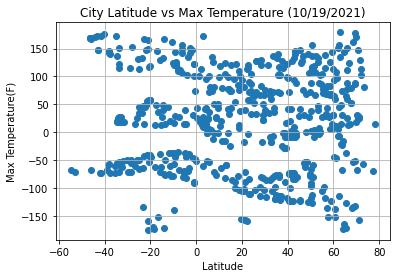

In [9]:
plt.scatter(CityWeather['Lat'],CityWeather['Lng'])
plt.title('City Latitude vs Max Temperature (10/19/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.grid()
plt.savefig('LatitudeVsMaxTemp.png')
plt.show()
#At 0 Degree Latitude,Temperatures range from -100 F to 150 F (Approx) today.

## Latitude vs. Humidity Plot

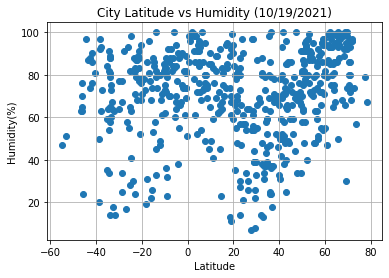

In [10]:
plt.scatter(CityWeather['Lat'],CityWeather['Humidity'])
plt.title('City Latitude vs Humidity (10/19/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.savefig('LatitudeVsHumidity.png')
plt.show()
#Lowest Humidity is between 20 and 40 degree latitude, (approx) at 30 degree.

## Latitude vs. Cloudiness Plot

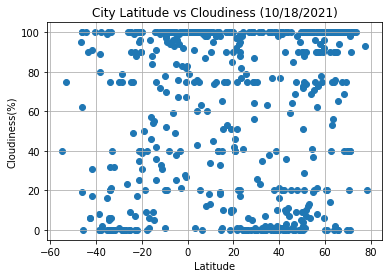

In [11]:
plt.scatter(CityWeather['Lat'],CityWeather['Cloudiness'])
plt.title('City Latitude vs Cloudiness (10/18/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()
plt.savefig('LatitudeVsCloudiness.png')
plt.show()
# Looks like locations with high humidity have high cloudiness

## Latitude vs. Wind Speed Plot

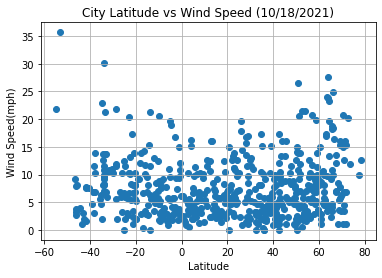

In [12]:
plt.scatter(CityWeather['Lat'],CityWeather['Wind Speed'])
plt.title('City Latitude vs Wind Speed (10/18/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()
plt.savefig('LatitudeVsWindspeed.png')
plt.show()
#Highest Wind speed is at -58 degree (approx) Latitiude

## Linear Regression

In [14]:
#North Hemisphere data set
NorthHemisphere=CityWeather[CityWeather['Lat']>=0]
#South Hemisphere data set
SouthHemisphere=CityWeather[CityWeather['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6844763178884982


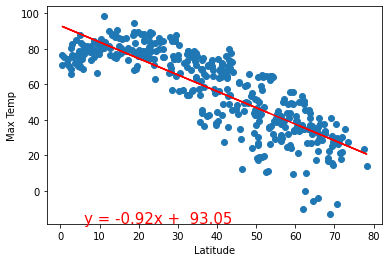

In [16]:
x_values=NorthHemisphere['Lat']
y_values=NorthHemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
#print(slope, intercept, rvalue, pvalue, stderr)
regressvalues=x_values*slope+intercept
line_eq=f"y = {str(round(slope,2))}x +  {str(round(intercept,2))}"
#print(line_eq)

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x_values,regressvalues,'red')
plt.annotate(line_eq,(6,-18),fontsize=15,color='red')
print(f"The r-value is: {rvalue**2}")
plt.savefig('NH_LatVsMaxTemp.png')
plt.show()
# Looks like as the one travles from North to equator temperature increases. 
# R value (~ 0.7) shows a strong uphill linear relantionship

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4289469260508109


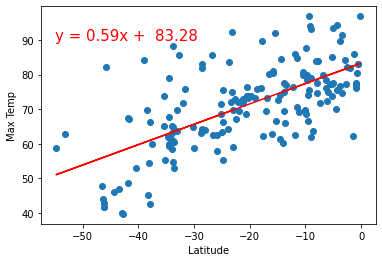

In [18]:
x_values=SouthHemisphere['Lat']
y_values=SouthHemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
#print(slope, intercept, rvalue, pvalue, stderr)
regressvalues=x_values*slope+intercept
line_eq=f"y = {str(round(slope,2))}x +  {str(round(intercept,2))}"
#print(line_eq)

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x_values,regressvalues,'red')
plt.annotate(line_eq,(-55,90),fontsize=15,color='red')
print(f"The r-value is: {rvalue**2}")
plt.savefig('SH_LatVsMaxTemp.png')
plt.show()
# Looks like as the one travles from South to equator temperature increases. 
# R value (~ 0.43) shows a weak uphill linear relantionship
#Norther Hemisphere has warmer teperatures than Souther hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.028041562216561313


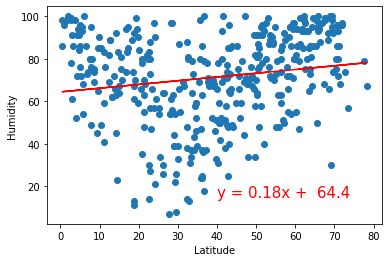

In [19]:
x_values=NorthHemisphere['Lat']
y_values=NorthHemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
#print(slope, intercept, rvalue, pvalue, stderr)
regressvalues=x_values*slope+intercept
line_eq=f"y = {str(round(slope,2))}x +  {str(round(intercept,2))}"
#print(line_eq)

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_values,regressvalues,'red')
plt.annotate(line_eq,(40,15),fontsize=15,color='red')
print(f"The r-value is: {rvalue**2}")
plt.savefig('NH_LatVsHumidity.png')
plt.show()
# Looks like there is no corelation between latitude and humidity
#Almost 0 R (approx 0.03) shows no linear relationship

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02022001321210142


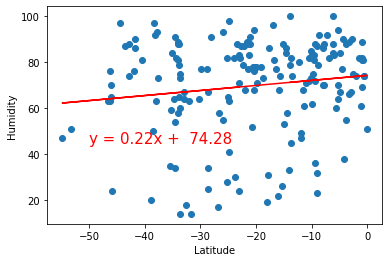

In [22]:
x_values=SouthHemisphere['Lat']
y_values=SouthHemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
#print(slope, intercept, rvalue, pvalue, stderr)
regressvalues=x_values*slope+intercept
line_eq=f"y = {str(round(slope,2))}x +  {str(round(intercept,2))}"
#print(line_eq)

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_values,regressvalues,'red')
plt.annotate(line_eq,(-50,45),fontsize=15,color='red')
print(f"The r-value is: {rvalue**2}")
plt.savefig('SH_LatVsHumidity.png')
plt.show()
# Looks like there is no corelation between latitude and humidity
#Almost 0 R (approx 0.02) shows no linear relationship
#Southern Hemishpere is in general lesser humid than northern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00040486958340821353


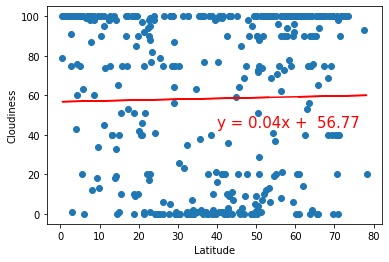

In [28]:
x_values=NorthHemisphere['Lat']
y_values=NorthHemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
#print(slope, intercept, rvalue, pvalue, stderr)
regressvalues=x_values*slope+intercept
line_eq=f"y = {str(round(slope,2))}x +  {str(round(intercept,2))}"
#print(line_eq)

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_values,regressvalues,'red')
plt.annotate(line_eq,(40,44),fontsize=15,color='red')
print(f"The r-value is: {rvalue**2}")
plt.savefig('NH_LatVsCloudiness.png')
plt.show()
# Looks like there is no corelation between latitude and Cloudiness
#Almost 0.00 R shows no linear relationship

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11737224876123263


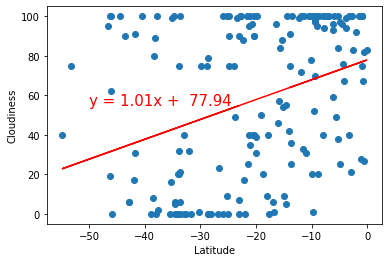

In [26]:
x_values=SouthHemisphere['Lat']
y_values=SouthHemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
#print(slope, intercept, rvalue, pvalue, stderr)
regressvalues=x_values*slope+intercept
line_eq=f"y = {str(round(slope,2))}x +  {str(round(intercept,2))}"
#print(line_eq)

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_values,regressvalues,'red')
plt.annotate(line_eq,(-50,55),fontsize=15,color='red')
print(f"The r-value is: {rvalue**2}")
plt.savefig('SH_LatVsCloudiness.png')
plt.show()
# Looks like there is no corelation between latitude and Cloudiness
#Almost 0.12 R shows no linear relationship
#Southern Hemishpere is less cloudy than northern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0543036871768514


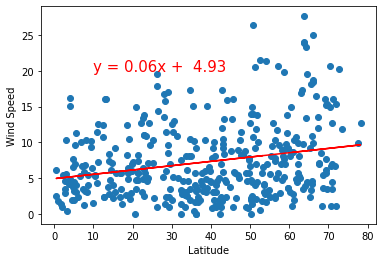

In [31]:
x_values=NorthHemisphere['Lat']
y_values=NorthHemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
#print(slope, intercept, rvalue, pvalue, stderr)
regressvalues=x_values*slope+intercept
line_eq=f"y = {str(round(slope,2))}x +  {str(round(intercept,2))}"
#print(line_eq)

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x_values,regressvalues,'red')
plt.annotate(line_eq,(10,20),fontsize=15,color='red')
print(f"The r-value is: {rvalue**2}")
plt.savefig('NH_LatVsWindspeed.png')
plt.show()
#Almost 0 R(Approx 0.05) shows no linear relationship

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03841709281247313


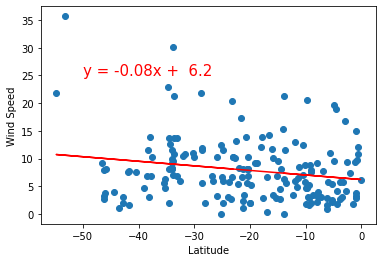

In [32]:
x_values=SouthHemisphere['Lat']
y_values=SouthHemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
#print(slope, intercept, rvalue, pvalue, stderr)
regressvalues=x_values*slope+intercept
line_eq=f"y = {str(round(slope,2))}x +  {str(round(intercept,2))}"
#print(line_eq)

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x_values,regressvalues,'red')
plt.annotate(line_eq,(-50,25),fontsize=15,color='red')
print(f"The r-value is: {rvalue**2}")
plt.savefig('SH_LatVsWindspeed.png')
plt.show()
#Almost 0 R(Approx 0.03) shows no linear relationship
# If we do not consider outlier wind speeds,Looks like both hemispheres have similar wind speeds.

# Observations